In [80]:
import pandas as pd
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.graph_objects as go
#!pip install scikit-learn --upgrade

In [81]:
file_path = '/home/ornela/audio_feature_songs/audio_features_10_songs/df_audio_features_10.csv'

# Check if file exists
if not os.path.isfile(file_path):
    print(f"File not found: {file_path}")
else:
    # Read the CSV into a DataFrame
    df_audio_features_10 = pd.read_csv(file_path, index_col ='song_name', nrows=17)
    #print(df_audio_features_10)


In [82]:
df_audio_features_10

,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
song_name,,,,,,,,,,,,,,,,
My Band,D12,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...
The Real Slim Shady,Eminem,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...
Águas De Março,Antônio Carlos Jobim,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
The Girl From Ipanema,Stan Getz,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
"Paint It, Black",The Rolling Stones,0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...
Sultans Of Swing,Dire Straits,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4,6cr6UDpkjEaMQ80OjWqEBQ,https://open.spotify.com/track/6cr6UDpkjEaMQ80...
Space Raiders - Charlotte de Witte Remix,Eats Everything,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4,4F8OK7mNa51mKqgHqWQiYm,https://open.spotify.com/track/4F8OK7mNa51mKqg...
In Silence,Amelie Lens,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4,2vfSCFvMbpf4hwxt22Wx7b,https://open.spotify.com/track/2vfSCFvMbpf4hwx...
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Johannes Brahms,0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwyd...


In [83]:
# Drop columns id and html for the moment
to_drop = ['id', 'html']
songs_df = df_audio_features_10.drop(columns=to_drop)
songs_df.head(3)

,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_name,,,,,,,,,,,,,,
My Band,D12,0.851,0.849,1,-3.383,0,0.0828,0.4970,0.000002,0.1160,0.844,120.014,298773,4
The Real Slim Shady,Eminem,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,284200,4
Águas De Março,Antônio Carlos Jobim,0.642,0.339,3,-15.503,1,0.1400,0.8540,0.000000,0.1050,0.491,143.418,212400,4


In [84]:
# Calculate the average score for each column
#average_scores = songs_df.mean()

# Sort the columns by their average scores in descending order
#sorted_columns = average_scores.sort_values(ascending=False)

# Select the top 3 columns from the sorted DataFrame
#top_3_columns = sorted_columns[:3]

# Print the top 3 columns
#top_3_columns

In [6]:
# Select the lowest 3 columns from the sorted DataFrame
#lowest_3_columns = sorted_columns[-3:]

# Print the top 3 columns
#lowest_3_columns

In [85]:
#songs_df.info()
songs_df.head(2)

,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_name,,,,,,,,,,,,,,
My Band,D12,0.851,0.849,1,-3.383,0,0.0828,0.4970,0.000002,0.1160,0.844,120.014,298773,4
The Real Slim Shady,Eminem,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,284200,4


In [8]:
# Exclude the 'artist' column
songs_df_numeric = songs_df.drop('artist', axis=1)

# Calculate the Euclidean distances
distances_array = pairwise_distances(songs_df_numeric, metric='euclidean')

# Create a DataFrame from the distances_array
euclidean_distances_df = pd.DataFrame(distances_array,
                                      index=songs_df_numeric.index,
                                      columns=songs_df_numeric.index)

# Display the DataFrame
euclidean_distances_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, My Band to Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1
Data columns (total 10 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   My Band                                                                10 non-null     float64
 1   The Real Slim Shady                                                    10 non-null     float64
 2   Águas De Março                                                         10 non-null     float64
 3   The Girl From Ipanema                                                  10 non-null     float64
 4   Paint It, Black                                                        10 non-null     float64
 5   Sultans Of Swing                                                       10 non-null     float64
 6   Space Raiders - Charlotte d

In [200]:
#euclidean_distances_df

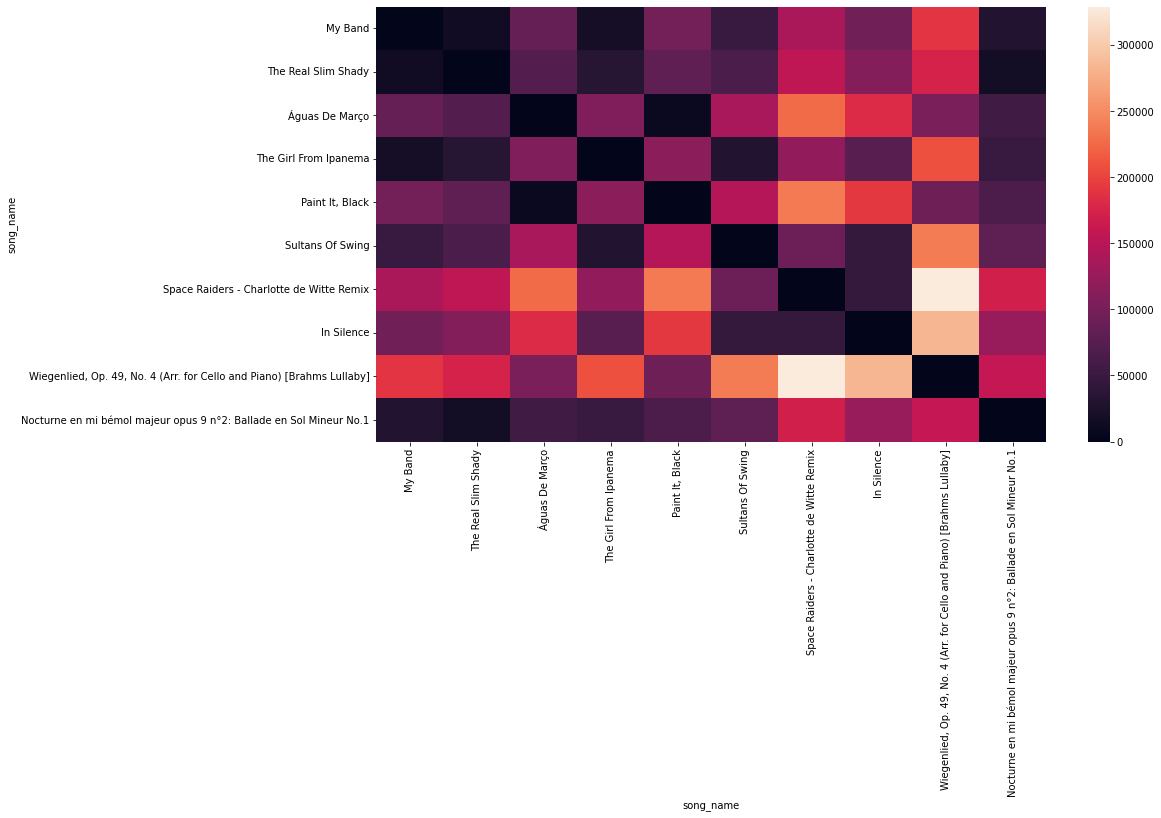

In [9]:
# Create a figure with a size of 12 inches by 8 inches
plt.subplots(figsize=(15, 8))

# Generate a heatmap of the Euclidean distances DataFrame withou Scaling
sns.heatmap(euclidean_distances_df);

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the songs_df_numeric DataFrame
scaled_data = scaler.fit_transform(songs_df_numeric)

# Convert the scaled data back to a DataFrame
songs_df_scaled = pd.DataFrame(scaled_data, columns=songs_df_numeric.columns, index=songs_df_numeric.index)

songs_df_scaled.head(3)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_name,,,,,,,,,,,,,
My Band,0.871895,1.000000,0.000000,1.000000,0.0,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076,0.574526,1.0
The Real Slim Shady,1.000000,0.776369,0.571429,0.971414,0.0,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503,0.530220,1.0
Águas De Março,0.598693,0.393341,0.285714,0.597610,1.0,1.000000,0.862189,0.000000,0.168552,0.494949,0.842866,0.311930,1.0


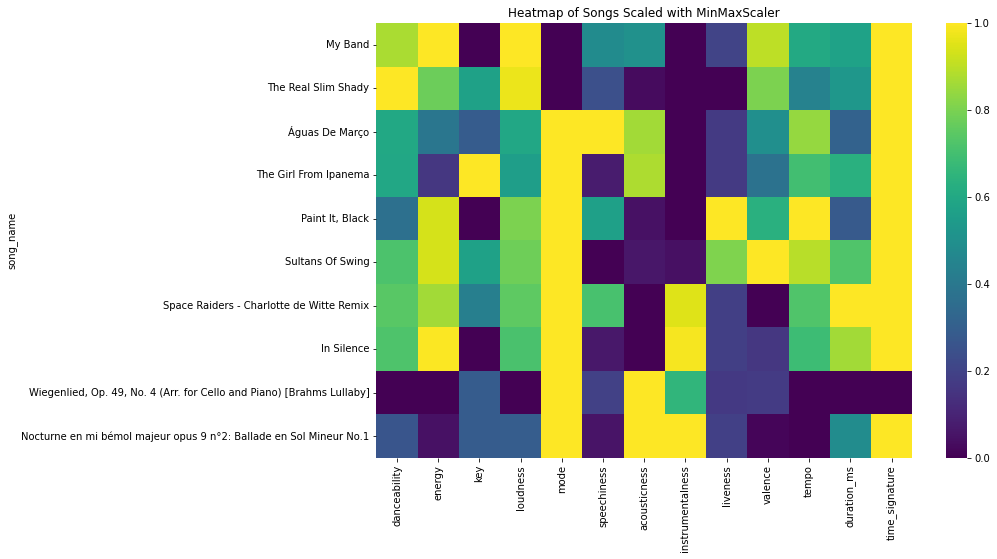

In [204]:
# Plotting the heatmap for MinMaxScaler
plt.figure(figsize=(12, 8))
plt.title("Heatmap of Songs Scaled with MinMaxScaler")
sns.heatmap(songs_df_scaled, cmap='viridis')
plt.show()

In [11]:
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object
scaler = RobustScaler()

# Scale the songs_df_numeric DataFrame
scaled_data = scaler.fit_transform(songs_df_numeric)

# Convert the scaled data back to a DataFrame
songs_df_robust_scaled = pd.DataFrame(scaled_data, columns=songs_df_numeric.columns, index=songs_df_numeric.index)

#songs_df_robust_scaled

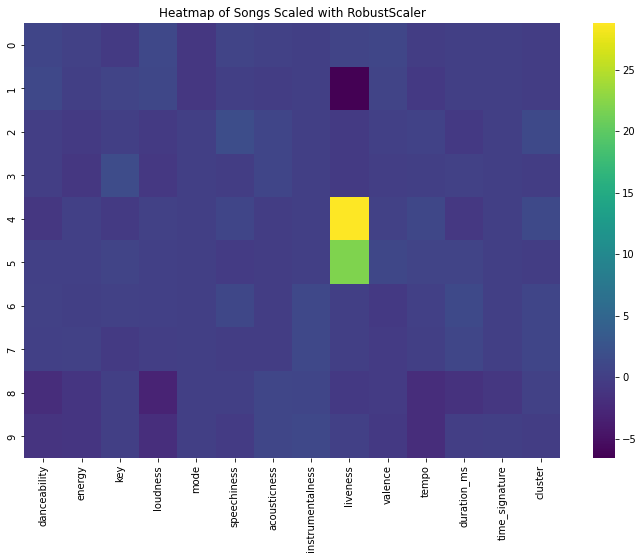

In [162]:

# Plotting the heatmap for RobustScaler
plt.figure(figsize=(12, 8))
plt.title("Heatmap of Songs Scaled with RobustScaler")
sns.heatmap(songs_df_robust_scaled, cmap='viridis')
plt.show()


In [163]:
#Effect of RobustScaler: This scaler is less sensitive to outliers than other scalers, such as MinMaxScaler. 
#It uses the median and interquartile range, which means it's more robust to outliers in your data. 
#If "Sultan of Swings" and "Paint it, Black" show higher robustness in the liveness feature, it could mean that these songs have values in 
#liveness that are outliers or significantly different from the median of this feature across all songs.

#Interpretation of Liveness: 
#The liveness feature in audio data typically represents the likelihood that the track was performed live. 
#A higher value in this feature usually suggests a higher probability that the track was recorded with a live audience.

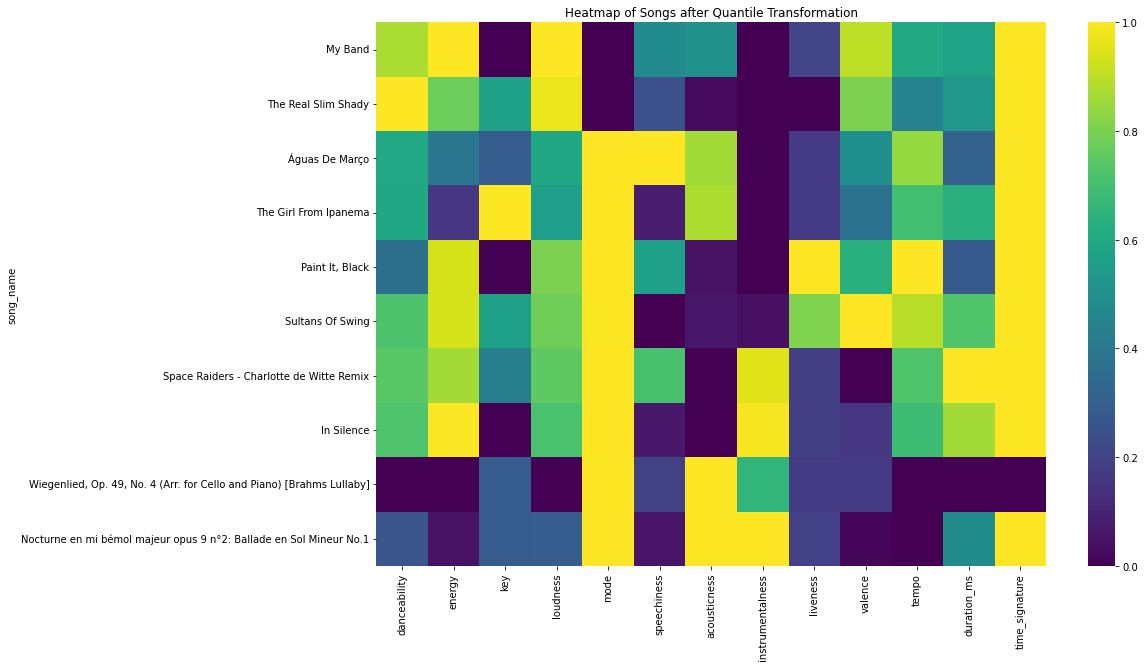

In [12]:
from sklearn.preprocessing import QuantileTransformer

# Number of samples
number_of_samples = songs_df_numeric.shape[0]

# Create a QuantileTransformer object
scaler = QuantileTransformer(n_quantiles=int(number_of_samples / 4))

# Transform the songs_df_numeric DataFrame
songs_df_quantile_array = scaler.fit_transform(songs_df_numeric)

# Convert the transformed data back to a DataFrame
songs_df_quantile = pd.DataFrame(songs_df_quantile_array, columns=songs_df_numeric.columns, index=songs_df_numeric.index)

# Creating the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(songs_df_quantile, cmap='viridis')
plt.title('Heatmap of Songs after Quantile Transformation')
plt.show()


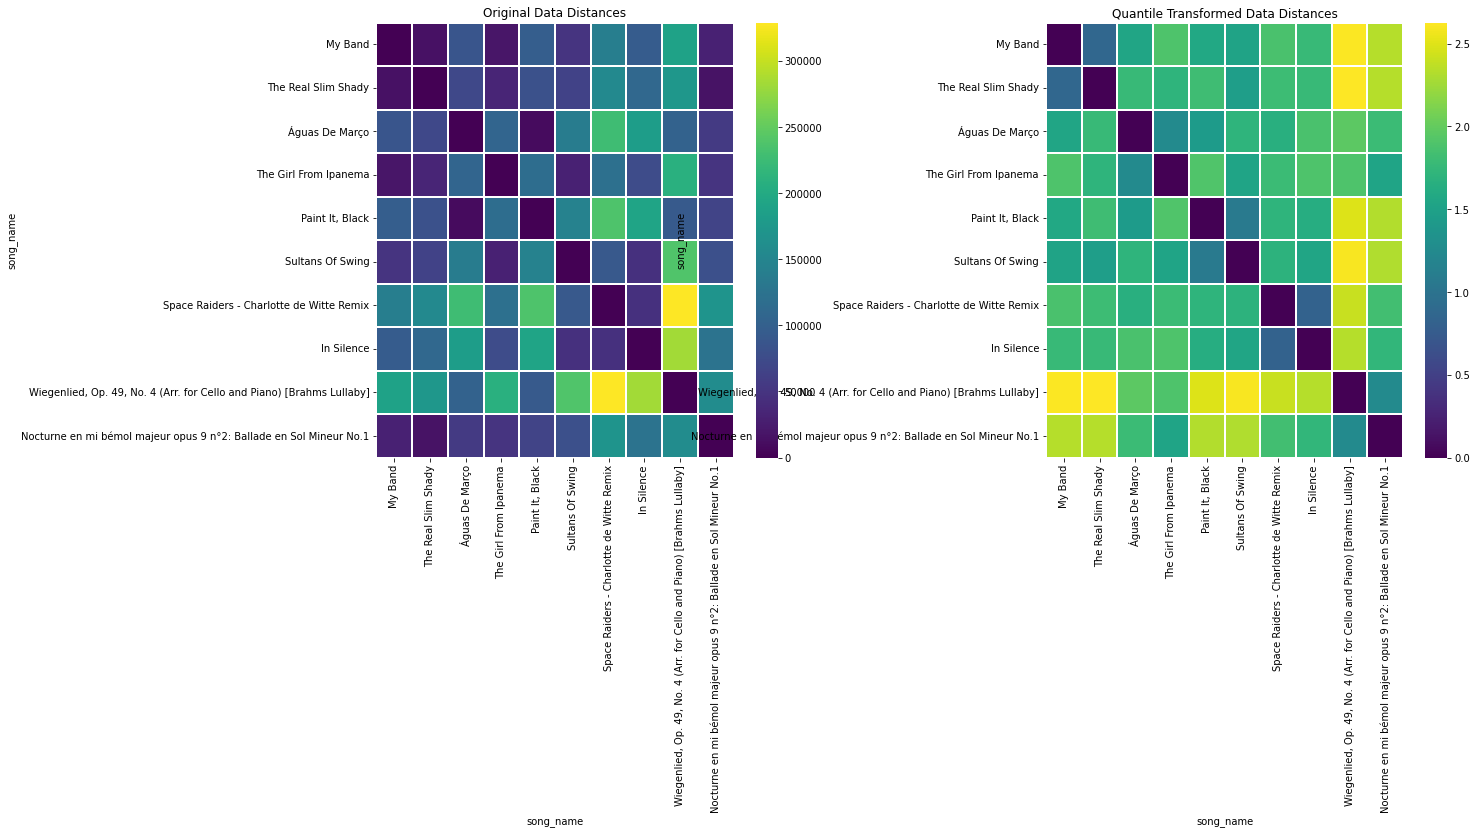

In [13]:
# Calculate the pairwise distances for the original data
# Exclude the 'artist' column
songs_df_numeric = songs_df.drop('artist', axis=1)

original_distances_df = pd.DataFrame(pairwise_distances(songs_df_numeric),
                                     index=songs_df_numeric.index,
                                     columns=songs_df_numeric.index)

# Calculate the pairwise distances for the Quantile transformed data
quantile_distances_df = pd.DataFrame(pairwise_distances(songs_df_quantile),
                                     index=songs_df_quantile.index,
                                     columns=songs_df_quantile.index)

# Setting up the subplot for two heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the heatmaps
sns.heatmap(original_distances_df, ax=ax1, linewidths=.2, cmap='viridis')
sns.heatmap(quantile_distances_df, ax=ax2, linewidths=.2, cmap='viridis')

# Adding titles to the plots
ax1.set_title('Original Data Distances')
ax2.set_title('Quantile Transformed Data Distances')

# Adjusting layout to add space between the plots
plt.subplots_adjust(wspace=0.5)  # Adjust this value as needed for desired spacing

plt.show()

In [14]:
# K-Means

In [61]:
# Generating our dataframe
df = pd.read_csv('/home/ornela/audio_feature_songs/audio_features_10_songs/df_audio_features_10.csv', 
                index_col = 'song_name')


In [62]:
df_drop = ['artist', 'id', 'html']
df_clean = df.drop(columns=df_drop)

In [63]:
songs_df = df_clean.copy()

In [64]:
scaler = MinMaxScaler().set_output(transform = 'pandas')
songs_df_minmax = scaler.fit_transform(songs_df)
songs_df_minmax.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_name,,,,,,,,,,,,,
My Band,0.871895,1.000000,0.000000,1.000000,0.0,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076,0.574526,1.0
The Real Slim Shady,1.000000,0.776369,0.571429,0.971414,0.0,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503,0.530220,1.0
Águas De Março,0.598693,0.393341,0.285714,0.597610,1.0,1.000000,0.862189,0.000000,0.168552,0.494949,0.842866,0.311930,1.0
The Girl From Ipanema,0.597386,0.156625,1.000000,0.554880,1.0,0.075938,0.875362,0.001818,0.168552,0.376722,0.697799,0.632941,1.0
"Paint It, Black",0.366013,0.935766,0.000000,0.804648,1.0,0.566331,0.046775,0.002673,1.000000,0.633838,1.000000,0.281123,1.0


In [65]:
# heatmap min_max
min_max_distances = pd.DataFrame(pairwise_distances(songs_df_minmax),
                                index = songs_df_minmax.index,
                                columns = songs_df_minmax.index)

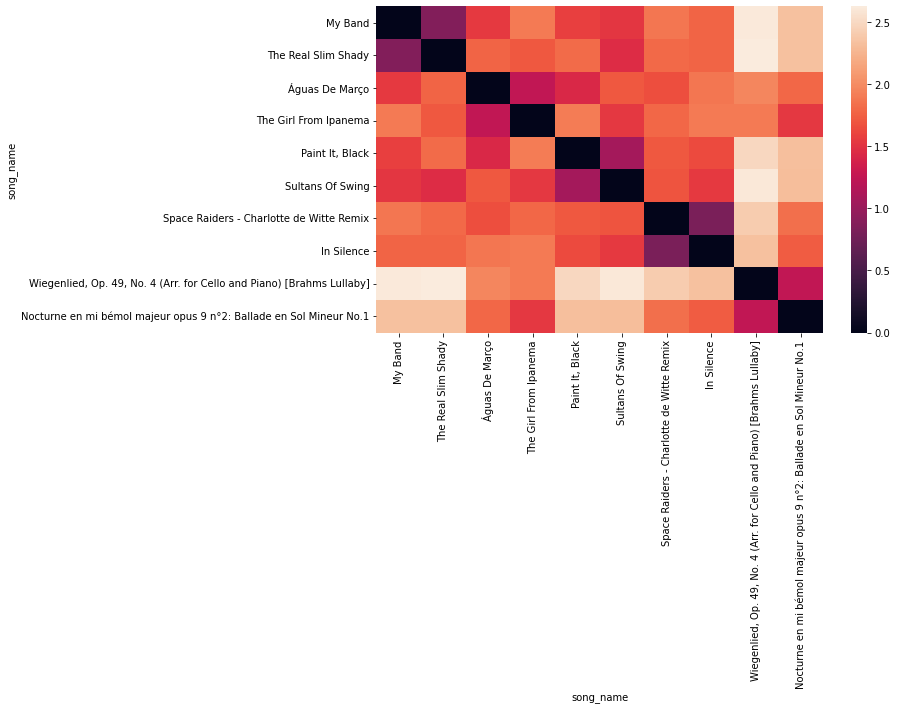

In [66]:
plt.subplots(figsize = (10, 6));
sns.heatmap(min_max_distances);

In [67]:
from sklearn.cluster import KMeans

# Initialise the model
kmeans = KMeans(n_clusters = 4,
                  n_init = 'auto',
                  random_state = 321)

In [68]:
kmeans

KMeans(n_clusters=4, n_init='auto', random_state=321)

In [69]:
# Fit the model to the data
kmeans.fit(songs_df_minmax)

KMeans(n_clusters=4, n_init='auto', random_state=321)

In [70]:
clusters

array([2, 2, 3, 3, 2, 2, 1, 1, 0, 0], dtype=int32)

In [71]:
kmeans.labels_

array([1, 1, 3, 3, 3, 1, 2, 2, 0, 0], dtype=int32)

In [72]:
kmeans.fit_predict(songs_df_minmax)

array([1, 1, 3, 3, 3, 1, 2, 2, 0, 0], dtype=int32)

In [73]:
# Attach the cluster output to our original DataFrame
songs_df_minmax['cluster'] = clusters

In [74]:
songs_df_minmax[['cluster']].sort_values('cluster')

,cluster
song_name,
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",0
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1,0
Space Raiders - Charlotte de Witte Remix,1
In Silence,1
My Band,2
The Real Slim Shady,2
"Paint It, Black",2
Sultans Of Swing,2
Águas De Março,3


In [75]:
songs_df_minmax.groupby(by='cluster').mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
cluster,,,,,,,,,,,,,
0,0.132680,0.021869,0.285714,0.146165,1.0,0.123056,0.999493,0.826396,0.177036,0.093205,0.000242,0.241133,0.5
1,0.730065,0.927439,0.214286,0.732470,1.0,0.385636,0.001186,0.968237,0.185520,0.079316,0.704847,0.931625,1.0
2,0.738889,0.911678,0.285714,0.888903,0.5,0.321363,0.158417,0.010718,0.501131,0.834424,0.734094,0.527989,1.0
3,0.598039,0.274983,0.642857,0.576245,1.0,0.537969,0.868776,0.000909,0.168552,0.435836,0.770332,0.472436,1.0


In [76]:
# Calculate the euclidean distance between the centroids
centroid_distances = pairwise_distances(centroids)

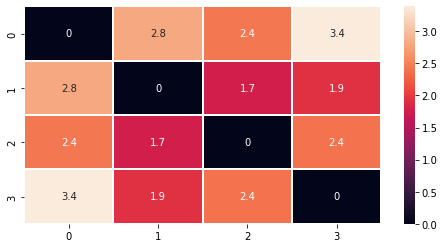

In [77]:
# Plot distances on heatmap
plt.subplots(figsize=(8, 4));
sns.heatmap(centroid_distances,
           annot = True,
           linewidths = .2);

In [78]:
df_clean.head(1)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_name,,,,,,,,,,,,,
My Band,0.851,0.849,1,-3.383,0,0.0828,0.497,0.000002,0.116,0.844,120.014,298773,4


In [79]:
# State the label for each arm of the chart
categories = ['danceability', 'energy', 'key', 'loudness',
       ' mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

# Create an empty list to store the objects
trace_objects = []

# Iterate over the unique cluster numbers and add an object for each cluster to the list
for cluster in sorted(songs_df_minmax['cluster'].unique()):
  cluster_parameter_means = go.Scatterpolar(
    r=[songs_df_minmax.loc[songs_df_minmax["cluster"] == cluster, 'danceability'].mean(),
      songs_df_minmax.loc[songs_df_minmax["cluster"] == cluster, 'energy'].mean(),
      songs_df_minmax.loc[songs_df_minmax["cluster"] == cluster, 'key'].mean(),
      songs_df_minmax.loc[songs_df_minmax["cluster"] == cluster, 'loudness'].mean(),
      songs_df_minmax.loc[songs_df_minmax["cluster"] == cluster, 'mode'].mean(),
      songs_df_minmax.loc[songs_df_minmax["cluster"] == cluster, 'speechiness'].mean(),
      songs_df_minmax.loc[songs_df_minmax["cluster"] == cluster, 'acousticness'].mean(),
      songs_df_minmax.loc[songs_df_minmax["cluster"] == cluster, 'instrumentalness'].mean(),
      songs_df_minmax.loc[songs_df_minmax["cluster"] == cluster, 'liveness'].mean(),
      songs_df_minmax.loc[songs_df_minmax["cluster"] == cluster, 'valence'].mean(),
      songs_df_minmax.loc[songs_df_minmax["cluster"] == cluster, 'tempo'].mean(),
      songs_df_minmax.loc[songs_df_minmax["cluster"] == cluster, 'duration_ms'].mean(),
      songs_df_minmax.loc[songs_df_minmax["cluster"] == cluster, 'time_signature'].mean()],
    theta=categories,
    fill='toself',
    name=f'Cluster {cluster}'
  )
  trace_objects.append(cluster_parameter_means)

# Add the objects to the figure
fig = go.Figure()
fig.add_traces(trace_objects)

# Add extras to the plot such as title
# You'll always need `polar=dict(radialaxis=dict(visible=True,range=[0, 1]))` when creating a radar plot
fig.update_layout(
  title_text = 'Radar chart of mean parameters by cluster',
  height = 600,
  width = 800,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

# Show the initialised plot and the layers
fig.show()